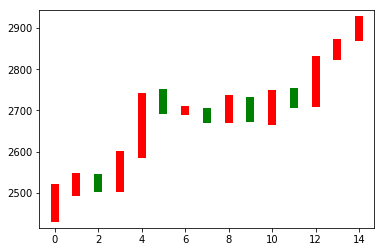

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#date = np.linspace(1,15,15)#可删
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08]
)
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])
#print(date)
plt.figure()
for i in range(0,15):
    dataOne = np.zeros([2])#定义二维数据
    dataOne[0] = i;
    dataOne[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i]>beginPrice[i]:
        plt.plot(dataOne,priceOne,'r',lw=8)
    else:
        plt.plot(dataOne,priceOne,'g',lw=8)
plt.show()

                
    

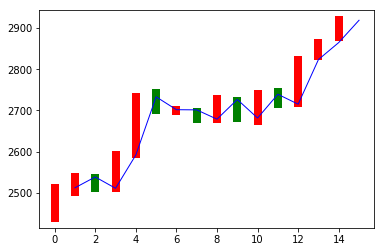

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08]
)
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])
plt.figure()#绘图
for i in range(0,15):
    dataOne = np.zeros([2])#定义二维数据
    dataOne[0] = i;
    dataOne[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i]>beginPrice[i]:
        plt.plot(dataOne,priceOne,'r',lw=8)
    else:
        plt.plot(dataOne,priceOne,'g',lw=8)
#plt.show()
dateNormal = np.zeros([15,1])#定义空矩阵
priceNormal = np.zeros([15,1])
for i in range(0,15):#归一化处理
    dateNormal[i,0] = i/14.0; #日期最大14
    priceNormal[i,0] = endPrice[i]/3000.0;#价格用I下标 最大值不超过3000
x = tf.placeholder(tf.float32,[None,1])#N行一列 placeholder装载
y = tf.placeholder(tf.float32,[None,1])
#B
w1 = tf.Variable(tf.random_uniform([1,10],0,1))#随机变量 0-1
b1 = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1)+b1
layer1 = tf.nn.relu(wb1)#激励函数
#C
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2)
loss = tf.reduce_mean(tf.square(y-layer2))#计算差值 y真实值 lyer2计算 =标准差
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)#梯度下降法调整缩小loss train表示只缩小一部分
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,10000):
        sess.run(train_step,feed_dict={x:dateNormal,y:priceNormal})
   #w1w2 b1b2 A+wb --> layer2(预测)
    pred = sess.run(layer2,feed_dict={x:dateNormal})
    predPrice = np.zeros([15,1])
    for i in range(0,15):
        predPrice[i,0]=(pred*3000)[i,0]
    plt.plot(date,predPrice,'b',lw=1)
plt.show()
                
                 
    